**Statistics Lab 52568 - Lab 8**

Idan Keipour 315355537

Menachem Sokolik 314696972

Maria Mordvova 345232821

In [ ]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt
import random
import statsmodels.api as sm
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure 
from functools import partialmethod 
from sklearn.preprocessing import normalize
import io
from sklearn import preprocessing



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/menac/OneDrive/Desktop/52568 STATISTICS LAB/LAB2"

Running on CoLab
Mounted at /content/drive


In [ ]:
# Loading elections 2021 elections data - ballot:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2020.csv to votes per ballot 2020 (1).csv
Saving votes per city 2020.csv to votes per city 2020 (1).csv
Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv
Saving votes per city 2021.csv to votes per city 2021 (1).csv
Saving eshkol_hevrati_calcali.xlsx to eshkol_hevrati_calcali.xlsx
Saving eshkol_hevrati_calcali.csv to eshkol_hevrati_calcali (1).csv


In [ ]:
df_2021_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_city_raw = df_2021_city_raw[df_2021_city_raw.index != 'מעטפות חיצוניות'] # dropping out מעטפות חיצוניות
df_2021_city = df_2021_city_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2021_city = df_2021_city[df_2021_city.columns[5:-1]] # removing "metadata" columns

df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2021_ballots = df_2021_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021_ballots = df_2021_ballots[df_2021_ballots.columns[9:-1]] # removing "metadata" columns

parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}

df_2020_city_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading data of 2020
df_2020_city = df_2020_city_raw[df_2020_city_raw.columns[6:-1]] # removing "metadata" columns
df_2020_ballots_raw_ = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב') # loading cities data
df_2020_ballots_ = df_2020_ballots_raw_.drop('סמל ועדה', axis=1) # new column added in Sep 2021


In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

real_p = parties_votes_percents(df_2021_ballots, 0.035)  # total votes for each party
names = real_p.keys() # 13 parties


In [ ]:
df_2021 = df_2021_ballots[names]
df_2021 = df_2021[df_2021.index != 'מעטפות חיצוניות'] 

In [ ]:
df_of_p = pd.DataFrame(pd.np.empty([0, 0])) #In this df we insert the value of "p" for every simulation
for i in range(100):
  midgam = df_2021.sample(n=7)
  p = parties_votes_percents(midgam, 0) 
  df_of_p = df_of_p.append(p, ignore_index = True)

p_midgam = df_of_p.mean(axis = 0).to_frame().T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


:כעת נחשב את האומדים מתוך הפונקציה שיצרנו

In [ ]:
bias = p_midgam - real_p
variance = df_of_p.var(axis = 0).to_frame().T
mse = bias**2 + variance
result = pd.concat([bias,variance,mse])
result.index = ["Bias","Variance","MSE"]
result = result.rename(columns = parties_dict_2021)
result

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
Bias,-0.001633,-0.005067,0.001465,0.001740,-0.003125,0.002701,0.005190,0.005916,-0.002113,0.017892,0.006853,-0.002962,0.000423
Variance,0.000742,0.000453,0.005276,0.002292,0.001174,0.000506,0.000743,0.003703,0.000512,0.003213,0.001875,0.001541,0.000114
MSE,0.000745,0.000478,0.005278,0.002295,0.001184,0.000514,0.000770,0.003738,0.000516,0.003533,0.001922,0.001550,0.000114


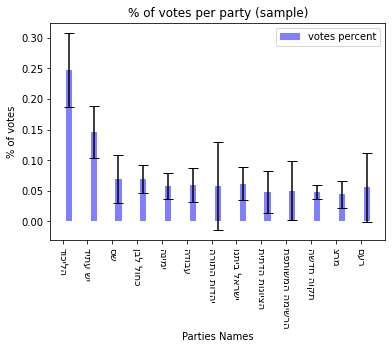

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcaa7631e10>)

In [ ]:
def party_bar_fix(p,p_sd):
    width = 0.25
    n = 13  
    rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()
    p_bar = ax.bar(np.arange(n)+ width, list(p.loc[0,names]),yerr= p_sd , align='center', alpha=0.5, ecolor='black', capsize=5, width=0.25, color='b')
    ax.set_ylabel('% of votes')
    ax.set_xlabel('Parties Names')
    ax.set_title('% of votes per party (sample)')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=-90)
    ax.legend((p_bar), (['votes percent']))

    plt.show()

    return fig, ax,

party_bar_fix(p_midgam,(variance**0.5).loc[0,names])

In [ ]:
small_parties_var = result.iloc[1,[0,1,2,3,4,6,8,12]].to_frame()
small_parties_var.T

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,ישראל ביתנו,מרצ,תקוה חדשה
Variance,0.000742,0.000453,0.005276,0.002292,0.001174,0.000743,0.000512,0.000114


פרט למפלגת הציונות הדתית ויהדות התורה נראה שהאומד לשונות דומה עבור כל המפלגות שקיבלו 6-7 מנדטים

*Question 2*

In [ ]:
if  run_in_colab:
    df_socio= pd.read_excel(io.BytesIO(uploaded['eshkol_hevrati_calcali.xlsx']), index_col='name')
else:
    df_socio= pd.read_excel('eshkol_hevrati_calcali.xlsx', index_col='name')

df_2021_ballots_raw = df_2021_ballots_raw[df_2021_ballots_raw.columns[0:-1]]
merged_data = df_2021_ballots_raw.join(df_socio.set_index('set_code'), on='סמל ישוב')

merged_data = merged_data.dropna()


In [ ]:
df = merged_data.groupby(['eco_level']).sum()
df.nlargest(7,'כשרים').index.sort_values() #These are the 'eshcolot' where there is the highest amount of cosher votes

Float64Index([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64', name='eco_level')

In [ ]:
clean_merged = merged_data[names]
clean_merged['eco_level'] = merged_data['eco_level']
clean_merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,מחל,פה,שס,כן,ב,אמת,ג,ל,ט,ודעם,ת,מרצ,עם,eco_level
שם ישוב,,,,,,,,,,,,,,
אבירים,5,27,1,16,0,47,0,2,2,3,8,31,0,7.0
אדירים,84,2,61,3,7,1,4,0,9,0,6,0,0,5.0
אושה,24,86,0,37,7,72,0,8,0,3,15,20,0,7.0
אחווה,27,37,2,36,4,14,0,3,4,0,8,10,0,8.0
איבים,17,0,1,5,4,0,0,0,10,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
קורנית,32,150,0,73,18,89,0,10,3,1,15,98,0,9.0
שורשים,32,81,0,38,19,60,0,7,1,3,25,21,0,8.0
שכניה,14,121,1,61,17,101,0,12,4,3,36,68,0,9.0


In [ ]:
sum_kosher = 0
for j in range(2,9):
  sum_kosher += df.loc[j,'כשרים'] #The number of kosher votes in the selected eshkolot

def layer_estimator():
  res = p_midgam-p_midgam #Just to get the shape of the final estimator

  for i in range(2,9): #these are the 'eshcolot' where there is the highest amount of citizens
    temp = clean_merged[clean_merged['eco_level'] == i][names]
    midgam = temp.sample(n=1)
    p_eco = parties_votes_percents(midgam, -1)
    res = res + (p_eco*df.loc[i,'כשרים'])

  p_hat = res/sum_kosher
  return p_hat

In [ ]:
df_of_layer_p = pd.DataFrame(pd.np.empty([0, 0])) #In this df we insert the value of "p" for every simulation
for j in range(100):
  a = layer_estimator()
  df_of_layer_p = df_of_layer_p.append(a,ignore_index = True)

df_of_layer_p.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
0,0.063530,0.042979,0.165594,0.001210,0.082776,0.045308,0.039789,0.241918,0.034887,0.000000,0.109021,0.140759,0.032229
1,0.055193,0.043848,0.010036,0.058407,0.037735,0.073401,0.056375,0.278246,0.038158,0.073359,0.135153,0.092165,0.047924
2,0.051306,0.049572,0.166444,0.001352,0.056087,0.065240,0.036847,0.292213,0.028540,0.001324,0.107117,0.096856,0.047101
3,0.097358,0.040820,0.030363,0.007059,0.084371,0.083645,0.027875,0.264584,0.029242,0.002013,0.110222,0.188641,0.033808
4,0.081243,0.062547,0.088249,0.038556,0.036246,0.079485,0.061805,0.203063,0.047325,0.033722,0.147970,0.071863,0.047926


:כעת נחשב את אומד השכבות באמצעות המדגמים שיצרנו

In [ ]:
p_layer = df_of_layer_p.mean(axis = 0).to_frame().T
layer_bias = p_layer - real_p
layer_variance = df_of_layer_p.var(axis = 0).to_frame().T
layer_mse = layer_bias**2 + layer_variance
layer_result = pd.concat([layer_bias,layer_variance,layer_mse])
layer_result.index = ["Bias","Variance","MSE"]
layer_result = layer_result.rename(columns = parties_dict_2021)
layer_result

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
Bias,-0.004079,-0.002979,-0.010425,0.017638,-0.001950,0.000836,0.003485,0.010942,-0.002106,0.005242,-0.001666,-0.002359,0.002103
Variance,0.000385,0.000469,0.002825,0.003572,0.000662,0.000253,0.000546,0.002546,0.000374,0.001568,0.000768,0.001099,0.000102
MSE,0.000402,0.000478,0.002934,0.003883,0.000666,0.000254,0.000558,0.002665,0.000378,0.001596,0.000771,0.001104,0.000106


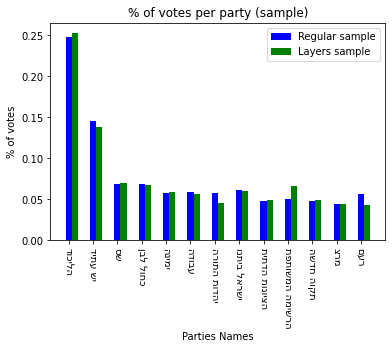

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcaa6e0c150>)

In [ ]:
def sample_plot(p_normal,p_layers):
    width = 0.25
    n = 13  
    rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()
    p_normal_bar = ax.bar(np.arange(n), list(p_normal.loc[0,names]), width=0.25, color='b')
    p_layers_bar = ax.bar(np.arange(n)+ width, list(p_layers.loc[0,names]), width=0.25, color='g')

    ax.set_ylabel('% of votes')
    ax.set_xlabel('Parties Names')
    ax.set_title('% of votes per party (sample)')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names,rotation=-90)
    ax.legend((p_normal_bar,p_layers_bar), ('Regular sample','Layers sample'))

    plt.show()

    return fig, ax,

sample_plot(p_midgam,p_layer)

In [ ]:
sum_regular_mse = result.loc['MSE',:].sum()
sum_layer_mse = layer_result.loc['MSE',:].sum()
print("The sum of MSE for all partys in the regular sample is: "+ str(sum_regular_mse))
print("The sum of MSE for all partys in the layers sample is: "+ str(sum_layer_mse))


The sum of MSE for all partys in the regular sample is: 0.02263651255363561
The sum of MSE for all partys in the layers sample is: 0.015794948991916254


אנו רואים שסכום השגיאה הריבועית הממוצעת נמוך יותר עבור אומד השכבות ולכן מבחינה זו הוא עדיף על המדגם הרגיל

Question 3

In [ ]:
df_2020_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2020.csv']),  encoding = 'iso-8859-8',index_col='שם ישוב').sort_index() # loading data of 2020
df_2020_ballots_raw = df_2020_ballots_raw[df_2020_ballots_raw.columns[10:-1]] # removing "metadata" columns

# Matching of the parties in the 2020 elections to the 2021 elections:
df_2020_ballots_raw['מרצ'] = round(df_2020_ballots_raw['אמת']/2)
df_2020_ballots_raw['אמת'] = round(df_2020_ballots_raw['אמת']/2)
df_2020_ballots_raw['עם'] = round(df_2020_ballots_raw['ודעם']*0.4)
df_2020_ballots_raw['ודעם'] = round(df_2020_ballots_raw['ודעם']*0.6)
df_2020_ballots_raw['ת'] = round(df_2020_ballots_raw['מחל']*0.167)
df_2020_ballots_raw['מחל'] = round(df_2020_ballots_raw['מחל']*0.833)
df_2020_ballots_raw['כן'] = round(df_2020_ballots_raw['פה']*0.333)
df_2020_ballots_raw['פה'] = round(df_2020_ballots_raw['פה']*0.667)
df_2020_ballots_raw['ב'] = round(df_2020_ballots_raw['טב']*0.6)
df_2020_ballots_raw['ט'] = round(df_2020_ballots_raw['טב']*0.4 + df_2020_ballots_raw['נץ'])

df_2020_ballots_raw = df_2020_ballots_raw.drop(["נץ","טב"], axis =1)

In [ ]:
q_for_q3 = parties_votes_percents(df_2020_ballots_raw, 0.00325)
alpha_vector = np.array(range(101))/100
bais_vector = q_for_q3 - real_p

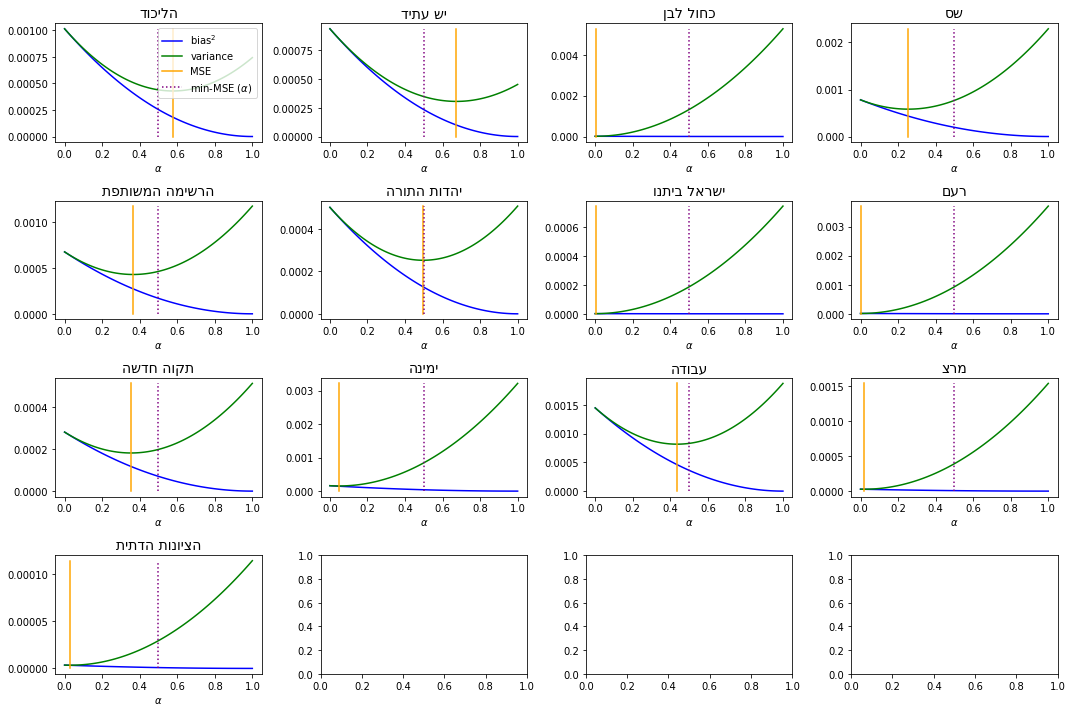

In [ ]:
names_rev = [parties_dict_2021[n][::-1] for n in q_for_q3.index]
fig, ax = plt.subplots(4, 4, figsize=(15,10))
for party in range(13):   
    bias_alpha = bais_vector[party] * (1-alpha_vector)
    var_alpha = result.iloc[1,party] * alpha_vector**2 
    mse_alpha = bias_alpha**2 + var_alpha
    alpha_star = bais_vector[party]**2 / (result.iloc[1,party] + bais_vector[party]**2)
    ax[party//4, party%4].plot(alpha_vector, bias_alpha**2, color="blue")
    ax[party//4, party%4].plot(alpha_vector, mse_alpha, color="green")
    ax[party//4, party%4].plot([alpha_star, alpha_star], [0,max(mse_alpha)], color="orange")
    ax[party//4, party%4].plot([0.5, 0.5], [0,max(mse_alpha)], linestyle = ':', color="purple")
    ax[party//4, party%4].set_title(names_rev[party], fontsize=14)
    ax[party//4, party%4].set_xlabel(r"$\alpha$")
    if party == 0:
        ax[party//4, party%4].legend(("bias$^2$", "variance", "MSE",r"min-MSE $(\alpha)$",r"$\alpha = 0.5$"))
fig.tight_layout() 
plt.show()

Conclusion: It can be clearly seen that in all parties when alpha equals 0.5 the square error is lower than when alpha equals 1, therefore it is clear that alpha equals 0.5 is preferable. A logical reason for this is that the smaller the alpha we give => more weight to the election results in 2020, for the inference to estimate the election results in 2021. On the other hand, we also want to give some weight to the lotteries, so we will observe that an alpha smaller than 1 but larger than 0 will give a smaller square error than an alpha equal to 0 or 1 (not necessarily any alpha in the 0 to 1 segment, but at least some alpha in this segment)